In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as date

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset

df = pd.read_csv('Adidas_Sales_Use.csv')

In [3]:
df

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


In [4]:
# Check the datsframe information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Retailer         9648 non-null   object
 1   RetailerID       9648 non-null   int64 
 2   InvoiceDate      9648 non-null   object
 3   Region           9648 non-null   object
 4   State            9648 non-null   object
 5   City             9648 non-null   object
 6   Product          9648 non-null   object
 7   PriceperUnit     9648 non-null   object
 8   UnitsSold        9648 non-null   object
 9   TotalSales       9648 non-null   object
 10  OperatingProfit  9648 non-null   object
 11  OperatingMargin  9648 non-null   object
 12  SalesMethod      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


### Data Cleaning

**Clean and convert key financial columns and date column:**
 - Extract numeric values from strings (removing commas, currency symbols, %, etc.)
 - Convert to appropriate data types: int64 for whole numbers, float for decimals
 - Handle missing values by filling with 0
 - Convert date column from object to date


In [5]:
# Extract numbers from TotalSales, remove commas, fill NaNs with 0, convert to int
df['TotalSales'] = df['TotalSales'].str.extract(r'([\d,]+)').replace(',','',regex=True).fillna(0).astype('int64')

# Extract numbers from OperatingProfit, remove commas, fill NaNs with 0, convert to int
df['OperatingProfit'] = df['OperatingProfit'].str.extract(r'([\d,]+)').replace(',','',regex=True).fillna(0).astype('int64')

# Extract decimal values from PriceperUnit, convert to float
df['PriceperUnit'] = df['PriceperUnit'].str.extract(r'([\d.]+)').fillna(0).astype(float)

# Extract digits from OperatingMargin, remove '%', convert to int
df['OperatingMargin'] = df['OperatingMargin'].str.extract(r'([\d]+)').replace('%','',regex=True).fillna(0).astype('float')/100

# Extract numbers from UnitsSold, remove commas, fill NaNs with 0, convert to int
df['UnitsSold'] = df['UnitsSold'].str.extract(r'([\d,]+)').replace(',','',regex=True).fillna(0).astype('int64')

# Convert Invoicedate from string to date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
# Check dataframe information to confirm if transformation was successful.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Retailer         9648 non-null   object        
 1   RetailerID       9648 non-null   int64         
 2   InvoiceDate      9648 non-null   datetime64[ns]
 3   Region           9648 non-null   object        
 4   State            9648 non-null   object        
 5   City             9648 non-null   object        
 6   Product          9648 non-null   object        
 7   PriceperUnit     9648 non-null   float64       
 8   UnitsSold        9648 non-null   int64         
 9   TotalSales       9648 non-null   int64         
 10  OperatingProfit  9648 non-null   int64         
 11  OperatingMargin  9648 non-null   float64       
 12  SalesMethod      9648 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 980.0+ KB


In [7]:
df.head()

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000,162000,0.30,In-store


In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
RetailerID,9648.0,1173849.72357,1128299.0,1185732.0,1185732.0,1185732.0,1197831.0,26360.377309
InvoiceDate,9648,2021-05-10 15:20:44.776119296,2020-01-01 00:00:00,2021-02-17 00:00:00,2021-06-04 00:00:00,2021-09-16 00:00:00,2021-12-31 00:00:00,NaN
PriceperUnit,9648.0,45.216625,7.0,35.0,45.0,55.0,110.0,14.705397
UnitsSold,9648.0,256.930037,0.0,106.0,176.0,350.0,1275.0,214.25203
TotalSales,9648.0,93273.4375,0.0,4254.5,9576.0,150000.0,825000.0,141916.016727
OperatingProfit,9648.0,34425.282131,0.0,1922.0,4371.5,52063.0,390000.0,54193.124141
OperatingMargin,9648.0,0.422991,0.1,0.35,0.41,0.49,0.8,0.097197


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

Retailer           0
RetailerID         0
InvoiceDate        0
Region             0
State              0
City               0
Product            0
PriceperUnit       0
UnitsSold          0
TotalSales         0
OperatingProfit    0
OperatingMargin    0
SalesMethod        0
dtype: int64

### EDA

**Performance Analysis**

In [11]:
df.head()

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000,162000,0.30,In-store


In [12]:
# What is the total revenue generated by each product category (e.g., Men's Street Footwear, Women's Apparel)?

Product_Revenue = df.groupby('Product')['TotalSales'].sum().sort_values(ascending=False) # Total Sales of each Product
Product_Revenue
#Product_Revenue

Product
Men's Street Footwear        208826244
Women's Apparel              179038860
Men's Athletic Footwear      153673680
Women's Street Footwear      128002813
Men's Apparel                123728632
Women's Athletic Footwear    106631896
Name: TotalSales, dtype: int64

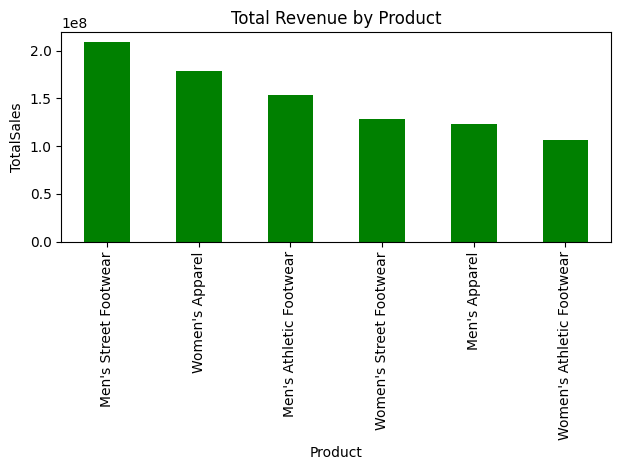

In [13]:
# Visualization of Total Revenue by Product

Product_Revenue.plot(kind='bar',color='Green')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('TotalSales')
plt.tight_layout()
plt.show()

In [14]:
# Which sales method (In-store vs. Outlet) generates the highest revenue across all products?

SalesMethod_Revenue = df.groupby(['SalesMethod'])['TotalSales'].sum().sort_values(ascending=False)
SalesMethod_Revenue

SalesMethod
In-store    356643750
Outlet      295585493
Online      247672882
Name: TotalSales, dtype: int64

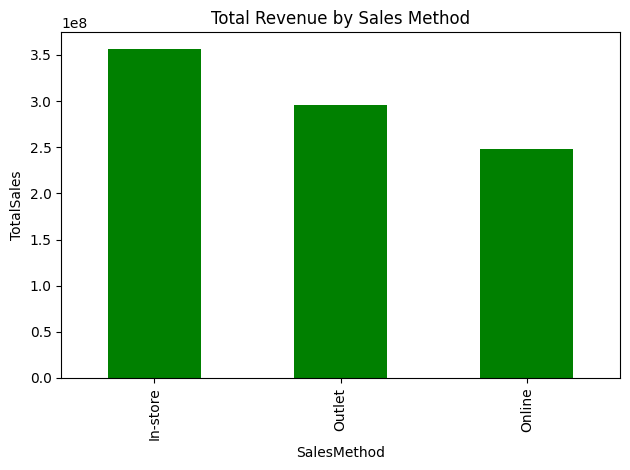

In [15]:
#Visualization of Total Revenue by Sales Method

SalesMethod_Revenue.plot(kind='bar',color='Green')
plt.title('Total Revenue by Sales Method')
plt.xlabel('SalesMethod')
plt.ylabel('TotalSales')
plt.tight_layout()
plt.show()


In [16]:
# What is the average operating margin across all product categories?

Avg_Margin = df.groupby('Product')['OperatingMargin'].mean().reset_index()

Avg_Margin

,Product,OperatingMargin
0,Men's Apparel,0.413225
1,Men's Athletic Footwear,0.402702
2,Men's Street Footwear,0.446130
3,Women's Apparel,0.441318
4,Women's Athletic Footwear,0.424359
5,Women's Street Footwear,0.410199


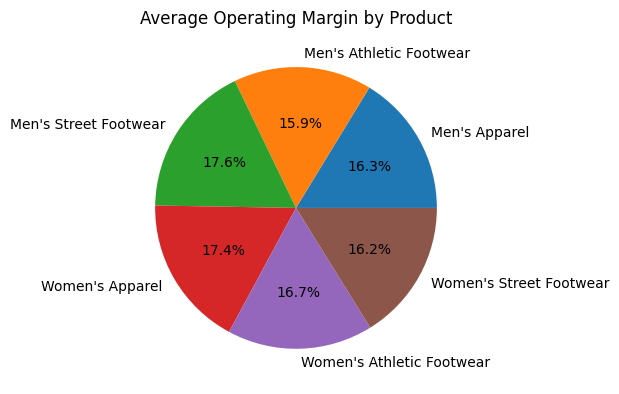

In [17]:
# Visualize using Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(Avg_Margin['OperatingMargin'],labels = Avg_Margin['Product'],autopct='%1.1f%%')
plt.title('Average Operating Margin by Product')
plt.tight_layout()
plt.show()


**Regional and Temporal Trends**

In [18]:
# How does the total revenue change across different weeks or months?

# Extract the year, month and month number from the date column.
df['Month'] = df['InvoiceDate'].dt.strftime('%b')
df['Month_Num'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.strftime('%Y')


In [19]:
# Get the monthly Revenue
Monthly_Revenue = df.groupby(['Month_Num','Month'])['TotalSales'].sum().reset_index()
Monthly_Revenue = Monthly_Revenue.sort_values('Month_Num')
Monthly_Revenue

,Month_Num,Month,TotalSales
0,1,Jan,71479142
1,2,Feb,61100153
2,3,Mar,56809109
3,4,Apr,72339970
4,5,May,80507695
5,6,Jun,74747372
6,7,Jul,95480694
7,8,Aug,92166201
8,9,Sep,77661459
9,10,Oct,63911033


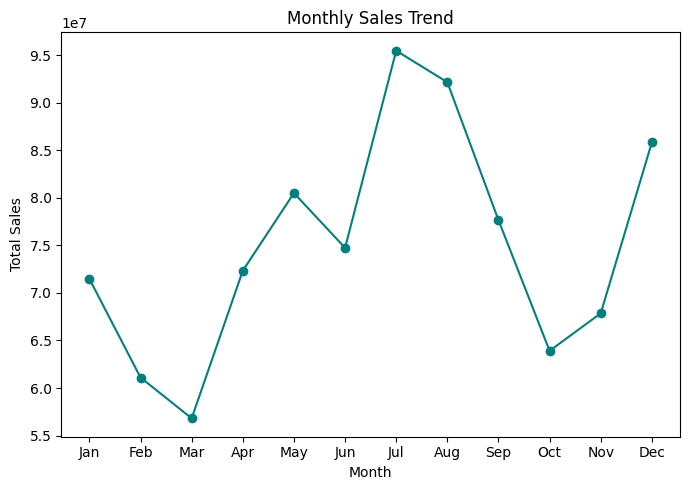

In [20]:
# Visualize Monthly trend

plt.figure(figsize=(7, 5))
plt.plot(Monthly_Revenue['Month'], Monthly_Revenue['TotalSales'], marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()



In [21]:
# Get Monthly Revenue trend grouped by Years

# Calculate total monthly revenue grouped by Year and Month, sorted in calendar order for trend analysis
Month_Yr_Revenue = df.groupby(['Month_Num','Month','Year'])['TotalSales'].sum().reset_index()

Month_Yr_Revenue = Month_Yr_Revenue.sort_values(['Year','Month_Num'])
# Pivot to get Month as rows and Years as column
Month_Yr_Revenue = Month_Yr_Revenue.pivot(index=['Month_Num','Month'], columns='Year', values='TotalSales').reset_index()


Month_Yr_Revenue

Year,Month_Num,Month,2020,2021
0,1,Jan,16253746,55225396
1,2,Feb,14997988,46102165
2,3,Mar,17660577,39148532
3,4,Apr,24607006,47732964
4,5,May,16918014,63589681
5,6,Jun,8829819,65917553
6,7,Jul,17146013,78334681
7,8,Aug,19877980,72288221
8,9,Sep,18304436,59357023
9,10,Oct,10836269,53074764


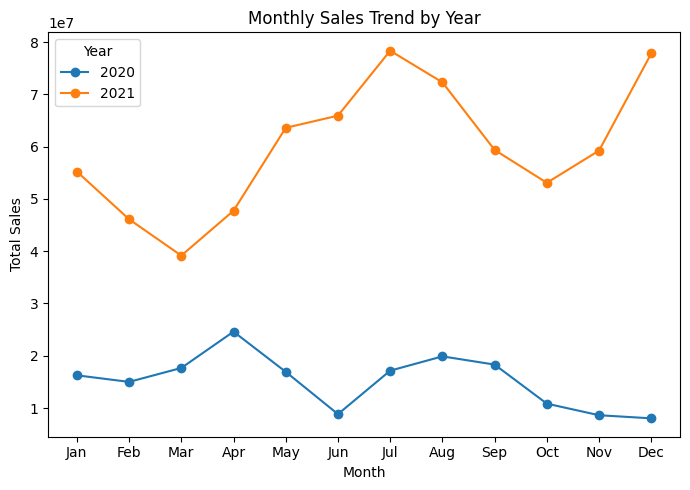

In [22]:
# Visualize Yearly Revenue grouped Monthly 
plt.figure(figsize=(7, 5))

for year in Month_Yr_Revenue.columns[2:]: # This gets the years
    plt.plot(Month_Yr_Revenue['Month'], Month_Yr_Revenue[year], marker='o', label=str(year))

plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.tight_layout()
plt.show()



In [23]:
# Which region contributes the most to the total sales, and does it align with the highest profitability?

Region_Pf = df.groupby('Region') [['TotalSales','OperatingProfit']].sum().sort_values(['TotalSales','OperatingProfit'],ascending=False)

Region_Pf

,TotalSales,OperatingProfit
Region,,
West,269943182,89609516
Northeast,186324067,68020688
Southeast,163171236,60555462
South,144663181,61138044
Midwest,135800459,52811412


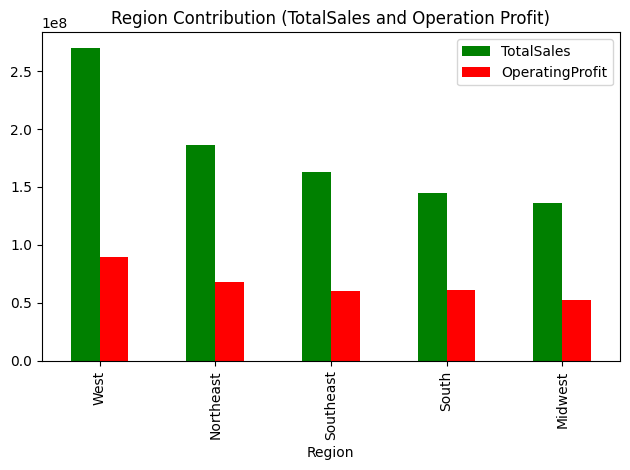

In [24]:
#Visualize Region contribution(TotalSales and profit)
Region_Pf.plot(kind='bar', color=('green','red'))
plt.title('Region Contribution (TotalSales and Operation Profit)')
plt.tight_layout()
plt.show()

In [25]:
# Are there specific dates or weeks when certain products experienced a significant spike or drop in sales?

#Create week column.
df['Week'] = df['InvoiceDate'].dt.isocalendar().week


In [26]:
# Get weekly sales.

weekly = (df.groupby(['Product', 'Year', 'Week'], as_index=False).agg(weekly_sales=('TotalSales','sum'))
    .sort_values(['Product', 'Year', 'Week']).reset_index(drop=True))

weekly

,Product,Year,Week,weekly_sales
0,Men's Apparel,2020,1,566028
1,Men's Apparel,2020,2,236232
2,Men's Apparel,2020,3,110225
3,Men's Apparel,2020,4,703442
4,Men's Apparel,2020,5,672435
...,...,...,...,...
626,Women's Street Footwear,2021,49,3110268
627,Women's Street Footwear,2021,50,3397051
628,Women's Street Footwear,2021,51,1822103
629,Women's Street Footwear,2021,52,211109


In [27]:
# Get Previous week's sales

weekly['prev_week_sales'] = (weekly.groupby('Product')['weekly_sales'].shift(1))

In [28]:
weekly

,Product,Year,Week,weekly_sales,prev_week_sales
0,Men's Apparel,2020,1,566028,NaN
1,Men's Apparel,2020,2,236232,566028.0
2,Men's Apparel,2020,3,110225,236232.0
3,Men's Apparel,2020,4,703442,110225.0
4,Men's Apparel,2020,5,672435,703442.0
...,...,...,...,...,...
626,Women's Street Footwear,2021,49,3110268,2136472.0
627,Women's Street Footwear,2021,50,3397051,3110268.0
628,Women's Street Footwear,2021,51,1822103,3397051.0
629,Women's Street Footwear,2021,52,211109,1822103.0


In [29]:
# Get weekly variannce and percentage change

weekly['variance']   = weekly['weekly_sales'] - weekly['prev_week_sales']
weekly['pct_change'] = weekly['variance'] / weekly['prev_week_sales'] * 100

weekly

,Product,Year,Week,weekly_sales,prev_week_sales,variance,pct_change
0,Men's Apparel,2020,1,566028,NaN,NaN,NaN
1,Men's Apparel,2020,2,236232,566028.0,-329796.0,-58.264962
2,Men's Apparel,2020,3,110225,236232.0,-126007.0,-53.340360
3,Men's Apparel,2020,4,703442,110225.0,593217.0,538.187344
4,Men's Apparel,2020,5,672435,703442.0,-31007.0,-4.407897
...,...,...,...,...,...,...,...
626,Women's Street Footwear,2021,49,3110268,2136472.0,973796.0,45.579628
627,Women's Street Footwear,2021,50,3397051,3110268.0,286783.0,9.220524
628,Women's Street Footwear,2021,51,1822103,3397051.0,-1574948.0,-46.362212
629,Women's Street Footwear,2021,52,211109,1822103.0,-1610994.0,-88.413992


In [30]:
# Filter out the weeks that had drops and spikes

weekly['variance_flag'] = np.where(weekly['pct_change'] > 0,'Spike',np.where(weekly['pct_change'] < 0,'Drop','No Change'))

weekly

,Product,Year,Week,weekly_sales,prev_week_sales,variance,pct_change,variance_flag
0,Men's Apparel,2020,1,566028,NaN,NaN,NaN,No Change
1,Men's Apparel,2020,2,236232,566028.0,-329796.0,-58.264962,Drop
2,Men's Apparel,2020,3,110225,236232.0,-126007.0,-53.340360,Drop
3,Men's Apparel,2020,4,703442,110225.0,593217.0,538.187344,Spike
4,Men's Apparel,2020,5,672435,703442.0,-31007.0,-4.407897,Drop
...,...,...,...,...,...,...,...,...
626,Women's Street Footwear,2021,49,3110268,2136472.0,973796.0,45.579628,Spike
627,Women's Street Footwear,2021,50,3397051,3110268.0,286783.0,9.220524,Spike
628,Women's Street Footwear,2021,51,1822103,3397051.0,-1574948.0,-46.362212,Drop
629,Women's Street Footwear,2021,52,211109,1822103.0,-1610994.0,-88.413992,Drop


In [31]:
# Filter out where there was significant,moderate or minor change in variance. 
#This section calculates how much change happened from previous week


def flag_check(row):
    if pd.isna(row['prev_week_sales']):
        return 'No Prior data'
    
    abs_diff = abs(row['variance'])
    
    if abs_diff >= 0.3 * row['prev_week_sales']:
        return 'Significant Change'
    elif abs_diff >= 0.1 * row['prev_week_sales']:
        return 'Moderate Change'
    elif abs_diff < 0.1 * row['prev_week_sales']:
        return 'Minor Change'
    else:
        return 'No Change'
        
weekly['flag_check'] = weekly.apply(flag_check, axis=1)

weekly

,Product,Year,Week,weekly_sales,prev_week_sales,variance,pct_change,variance_flag,flag_check
0,Men's Apparel,2020,1,566028,NaN,NaN,NaN,No Change,No Prior data
1,Men's Apparel,2020,2,236232,566028.0,-329796.0,-58.264962,Drop,Significant Change
2,Men's Apparel,2020,3,110225,236232.0,-126007.0,-53.340360,Drop,Significant Change
3,Men's Apparel,2020,4,703442,110225.0,593217.0,538.187344,Spike,Significant Change
4,Men's Apparel,2020,5,672435,703442.0,-31007.0,-4.407897,Drop,Minor Change
...,...,...,...,...,...,...,...,...,...
626,Women's Street Footwear,2021,49,3110268,2136472.0,973796.0,45.579628,Spike,Significant Change
627,Women's Street Footwear,2021,50,3397051,3110268.0,286783.0,9.220524,Spike,Minor Change
628,Women's Street Footwear,2021,51,1822103,3397051.0,-1574948.0,-46.362212,Drop,Significant Change
629,Women's Street Footwear,2021,52,211109,1822103.0,-1610994.0,-88.413992,Drop,Significant Change


In [32]:
weekly.to_excel('weekly.xlsx',index=False)

In [33]:
#Which product category has the highest operating profit across the different sales methods?

OP_SalesMethod = df.groupby(['Product','SalesMethod'])['OperatingProfit'].sum().reset_index()

OP_SalesMethod = OP_SalesMethod.pivot(index=['Product'], columns=['SalesMethod'], values='OperatingProfit')
OP_SalesMethod

SalesMethod,In-store,Online,Outlet
Product,,,
Men's Apparel,17474515,12827885,14460699
Men's Athletic Footwear,19702401,15674210,16470353
Men's Street Footwear,34867115,22958045,24977163
Women's Apparel,26285131,20843612,21522253
Women's Athletic Footwear,13568638,11540240,13866965
Women's Street Footwear,15693582,12711345,16690970


In [34]:
OP_SalesMethod['Total_OperatingProfit'] = OP_SalesMethod.sum(axis=1)

OP_SalesMethod

SalesMethod,In-store,Online,Outlet,Total_OperatingProfit
Product,,,,
Men's Apparel,17474515,12827885,14460699,44763099
Men's Athletic Footwear,19702401,15674210,16470353,51846964
Men's Street Footwear,34867115,22958045,24977163,82802323
Women's Apparel,26285131,20843612,21522253,68650996
Women's Athletic Footwear,13568638,11540240,13866965,38975843
Women's Street Footwear,15693582,12711345,16690970,45095897


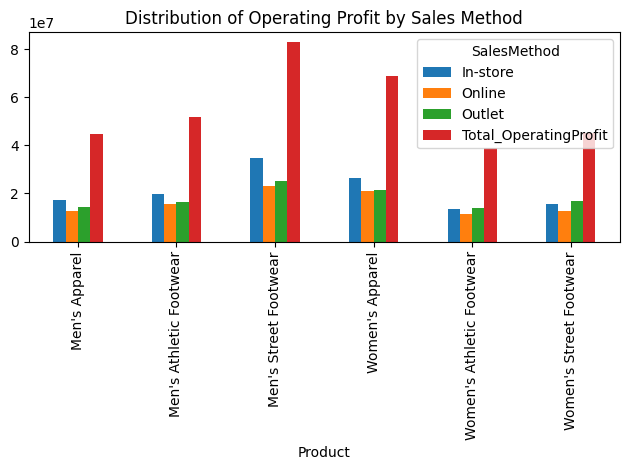

In [35]:
# Visualize Sales method operating profit contribution.
OP_SalesMethod.plot(kind='bar')
plt.title('Distribution of Operating Profit by Sales Method')
plt.tight_layout()
plt.show()

In [36]:
# What is the average profit margin for products sold via the diff sales method?

Avg_op = df.groupby(['Product','SalesMethod'])['OperatingProfit'].mean().round(0).reset_index()

Avg_op = Avg_op.pivot(index=['Product'], columns=['SalesMethod'], values='OperatingProfit')
Avg_op

SalesMethod,In-store,Online,Outlet
Product,,,
Men's Apparel,60050.0,15778.0,28806.0
Men's Athletic Footwear,68174.0,19209.0,32615.0
Men's Street Footwear,120231.0,28135.0,49558.0
Women's Apparel,90638.0,25575.0,42788.0
Women's Athletic Footwear,46788.0,14177.0,27623.0
Women's Street Footwear,54116.0,15597.0,33183.0


In [37]:
# what is the average units sold per day for each product category?


# Get daily units sold per product and date
Daily_sales = df.groupby(['Product', 'InvoiceDate'], as_index=False).agg(daily_units_sold=('UnitsSold', 'sum'))

#  Calculate the average daily units sold per product
Daily_sales_avg=Daily_sales.groupby('Product', as_index=False).agg(avg_units_sold=('daily_units_sold', 'mean')).round(2)
                                                                    
Daily_sales_avg

,Product,avg_units_sold
0,Men's Apparel,842.54
1,Men's Athletic Footwear,1223.39
2,Men's Street Footwear,1630.00
3,Women's Apparel,1222.05
4,Women's Athletic Footwear,891.11
5,Women's Street Footwear,1080.63
